In [28]:
import matplotlib.pyplot as plt
import spikeinterface
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np

If your data has more sessions, please modify the following code

In [29]:
a = se.BlackrockRecordingExtractor(r'datafile001.ns6',stream_id='6',block_index=0)
b = se.BlackrockRecordingExtractor(r'datafile002.ns6',stream_id='6',block_index=1)
# c = se.BlackrockRecordingExtractor(r'datafile003.ns6',stream_id='6',block_index=2)

a = a.channel_slice([str(i+1) for i in range(32)])
b = b.channel_slice([str(i+1) for i in range(32)])
# c = c.channel_slice([str(i+1) for i in range(32)])

recording_list = [a,b]
# recording_list = [a,b,c]

In [30]:
rec = si.concatenate_recordings(recording_list)
print(rec)
s = rec.get_num_samples(segment_index=0)
print(f'segment {0} num_samples {s}')

ConcatenateSegmentRecording: 32 channels - 1 segments - 30.0kHz - 3640.020s
segment 0 num_samples 109200602


Compute location of each recording site. If you are using a different probe, you should set the location of each recording site with your own code. 

[  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45. 250. 253. 256. 259. 262. 265. 268. 271. 274. 277. 280. 283.
 286. 289. 292. 295.]


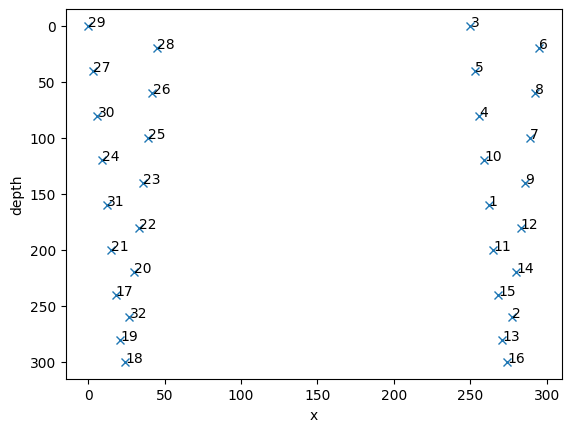

In [31]:
dx = 3
dy = 20
P = 250

x = np.zeros((32,))
y = np.zeros((32,))
x0 = 0
y0 = 0
for k in range(32):
    x[k] = x0
    y[k] = y0

    if k == 15:
        x0 = x[0] + P
        y0 = y[0]
    else:
        x0 += dx 
        if k<7 or (k>=16 and k<23):
            y0 += dy*2
        elif k==7 or k==23:
            y0 += dy
        elif (k>7 and k<=15) or (k>23 and k<=31):
            y0 -=dy*2

location = np.transpose(np.array([x,y]))

idx_raw = [29,27,30,24,31,21,17,19,18,32,20,22,23,25,26,28,3,5,4,10,1,11,15,13,16,2,14,12,9,7,8,6]
idx = np.argsort(idx_raw)
location = location[idx,:]

plt.plot(location[:,0],location[:,1],'x')
for i in range(len(idx)):
    plt.annotate(str(i+1), xy = (location[i,0], location[i,1]), xytext = (location[i,0]+0.1, location[i,1]+0.1))
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('depth')
plt.show()

        
    

In [32]:
rec.set_channel_locations(location)

Change the code that refers to the path of kilosort

In [33]:
ss.Kilosort3Sorter.set_kilosort3_path(r'C:/Users/jiumao/Desktop/Kilosort')
ss.Kilosort2_5Sorter.set_kilosort2_5_path(r'C:/Users/jiumao/Desktop/Kilosort_2_5')

Setting KILOSORT3_PATH environment variable for subprocess calls to: C:\Users\jiumao\Desktop\KiloSort
Setting KILOSORT2_5_PATH environment variable for subprocess calls to: C:\Users\jiumao\Desktop\Kilosort_2_5


Choose which version of kilosort you want to use. Kilosort2.5 has 'Feature view' in phy while Kilosort3 does not.

In [71]:
output = ss.run_kilosort2_5(rec)
# output = ss.run_kilosort3(rec)

RUNNING SHELL SCRIPT: C:\Users\jiumao\AppData\Local\Temp\tmp_shellscriptktk5asst\script.bat
RUNNING SHELL SCRIPT: C:\Users\jiumao\AppData\Local\Temp\tmp_shellscripta32h_dep\script.bat
RUNNING SHELL SCRIPT: C:\Users\jiumao\AppData\Local\Temp\tmp_shellscriptbxl24o_s\script.bat
RUNNING SHELL SCRIPT: c:\Users\jiumao\Desktop\20230103\kilosort3_output\run_kilosort3.bat
